In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',40)

In [2]:
np.random.seed(42)
x = 2*np.random.rand(100,1)-1
y = 4*x -2 + np.random.rand(100,1)

In [3]:
x_b = np.c_[np.ones((100,1)),x]             # adding bias term
# x_b

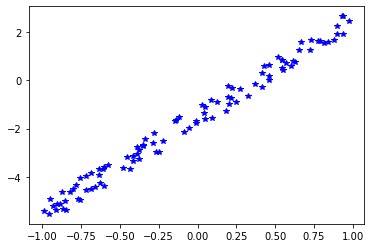

In [4]:
plt.plot(x,y,'b*')
plt.show()

In [5]:
sol = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [6]:
sol

array([[-1.50316817],
       [ 3.98323418]])

In [7]:
x_new = np.linspace(-1,1, 200).reshape(200,1)
x_new_b = np.c_[np.ones((200,1)), x_new]
y_new = x_new_b.dot(sol)

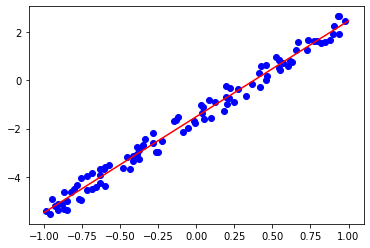

In [8]:
plt.plot(x,y,'bo')      # scattered points
plt.plot(x_new,y_new,'r-')
plt.show()

In [9]:
np.random.seed(102)
z = np.random.rand(10)
z

array([0.59768158, 0.6759869 , 0.29928174, 0.73074027, 0.57873939,
       0.80901767, 0.1672485 , 0.31214497, 0.35793155, 0.4917473 ])

# Finding the solution from gradient descent

In [41]:
np.random.seed(42)
theta = 0.1
eta= 0.2
m = 10
iterations = 1000
shuffled_index = np.random.permutation(100)
x_b = x_b[shuffled_index]
y = y[shuffled_index]
for i in range(0,len(x),m):
    x_i = x_b[i:i+m]
    y_i = y[i:i+m]
    gradients = 2/m * x_i.T.dot(x_i.dot(theta) -y_i)
    # if i<10:
        # print(theta)
    theta = theta - eta *  gradients

In [42]:
shuffled_index

array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
       77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28,
       93,  5, 66, 65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,
        3, 17, 38,  8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68,
       61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1,
       52, 21,  2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51])

In [43]:
theta[:,0]

array([-1.50299457,  3.242524  ])

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [45]:
lin_reg.coef_, lin_reg.intercept_

(array([[-0.13580927]]), array([-1.74882179]))

In [46]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [47]:
sgd_reg.fit(x,y.ravel())

SGDRegressor()

In [48]:
sgd_reg.coef_, sgd_reg.intercept_

(array([-0.06830451]), array([-1.71601844]))

In [49]:
y_new_sgd = x_new_b.dot(theta[:,0])

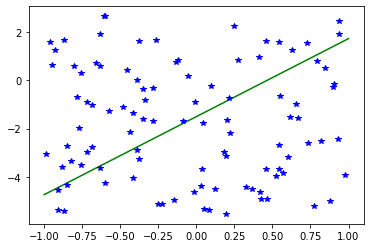

In [50]:
plt.plot(x_new,y_new_sgd,'g-')
plt.plot(x,y,'b*')
plt.show()

In [51]:
import pandas as pd

In [52]:
car = pd.read_csv('/mnt/New_Volume/Work_From_Home/Data/car_price_clean.csv')
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [78]:
y = car['price'].astype(np.float32)

In [53]:
cols = list(car.columns)
for i in cols:
    car[i] = car[i].replace('?', np.nan)

In [54]:
car.isna().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [55]:
l = {}
for i,val in enumerate(car.columns):
    l[val] = i

In [56]:
l

{'symboling': 0,
 'normalized_losses': 1,
 'Fuel_type': 2,
 'make': 3,
 'num_of_doors': 4,
 'aspiration': 5,
 'wheel_base': 6,
 'engine_location': 7,
 'drive_wheels': 8,
 'body_style': 9,
 'length': 10,
 'width': 11,
 'height': 12,
 'curb_weight': 13,
 'engine_type': 14,
 'num_of_cylinders': 15,
 'engine_size': 16,
 'fuel_system': 17,
 'bore': 18,
 'stroke': 19,
 'compression_ratio': 20,
 'horsepower': 21,
 'peak_rpm': 22,
 'city_mpg': 23,
 'highway_mpg': 24,
 'price': 25}

In [57]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [58]:
from sklearn.impute import SimpleImputer                            # to fill missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder     # scler for sacling the values one hotencoder to convrt categorical cols to numerical
from sklearn.pipeline import Pipeline, FeatureUnion                 # pipeline to follw a precedure/ fixed path, feature union to merge two pipelines in to one
from sklearn.base import BaseEstimator,TransformerMixin

In [59]:
# to separate the Data into numerical and catecorical columns creating our custom classes
# Writinf a class for returning categorical data out of complete data
class categorical(BaseEstimator, TransformerMixin):
    
    def fit(self, x,y=None):
        return self
    
    def transform(self, x,y = None):
        l_i = [l[x] for x in l_cat]
        d_ = x.iloc[:,l_i]
        # d_ = x['Fuel_type','make','num_of_doors','aspiration','wheel_base','engine_location','body_style','engine_type','num_of_cylinders','fuel_system']
        return np.array(d_)

In [60]:
l_cat = ['Fuel_type','make','num_of_doors','aspiration','wheel_base','engine_location','body_style','engine_type','num_of_cylinders','fuel_system']
len(l_cat)

10

In [61]:
l_num = ['symboling','normalized_losses','drive_wheels','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']
len(l_num)

15

In [62]:
# Writing a class for returning numerical data out of complete data
class numerical(BaseEstimator, TransformerMixin):
    
    def fit(self, x,y=None):
        return self
    
    def transform(self, x,y = None):
        l_i = [l[x] for x in l_num]
        d_ = x.iloc[:,l_i]
        return np.array(d_).astype(np.float64)

In [63]:
num = numerical()
num.transform(car)

array([[ 3.000e+00,        nan,  8.860e+01, ...,  5.000e+03,  2.100e+01,
         2.700e+01],
       [ 3.000e+00,        nan,  8.860e+01, ...,  5.000e+03,  2.100e+01,
         2.700e+01],
       [ 1.000e+00,        nan,  9.450e+01, ...,  5.000e+03,  1.900e+01,
         2.600e+01],
       ...,
       [-1.000e+00,  9.500e+01,  1.091e+02, ...,  5.500e+03,  1.800e+01,
         2.300e+01],
       [-1.000e+00,  9.500e+01,  1.091e+02, ...,  4.800e+03,  2.600e+01,
         2.700e+01],
       [-1.000e+00,  9.500e+01,  1.091e+02, ...,  5.400e+03,  1.900e+01,
         2.500e+01]])

In [64]:
cat = categorical()
cat.transform(car)

array([['gas', 'std', 'two', ..., 'dohc', 'four', 'mpfi'],
       ['gas', 'std', 'two', ..., 'dohc', 'four', 'mpfi'],
       ['gas', 'std', 'two', ..., 'ohcv', 'six', 'mpfi'],
       ...,
       ['gas', 'std', 'four', ..., 'ohcv', 'six', 'mpfi'],
       ['diesel', 'turbo', 'four', ..., 'ohc', 'six', 'idi'],
       ['gas', 'turbo', 'four', ..., 'ohc', 'four', 'mpfi']], dtype=object)

In [65]:
num_pipeline= Pipeline([('num_extractor',numerical()),('imputer', SimpleImputer(strategy = 'median')),('scale_data', StandardScaler())])
cat_pipeline= Pipeline([('cat_extractor',categorical()),('encoder', OneHotEncoder(sparse=False))])

In [66]:
# cat_pipeline.fit_transform(car)
# num_pipeline.fit_transform((car))

In [67]:
union = FeatureUnion(transformer_list=[('numerical_pipeline',num_pipeline),('category_pipeline',cat_pipeline)])

In [68]:
data_prepared = union.fit_transform(car)

In [71]:
data_prepared.shape

(205, 76)

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [81]:
pd.DataFrame(data_prepared).isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
71    0
72    0
73    0
74    0
75    0
Length: 76, dtype: int64

In [84]:
y = pd.Series(y)

In [85]:
y = y.fillna(y.median())

In [86]:
y.isna().sum()

0

In [87]:
lin_reg.fit(data_prepared,y)

LinearRegression()

In [89]:
lin_reg.coef_, lin_reg.intercept_

(array([ 4.45506850e+01, -3.61350507e+02,  8.31548358e+02, -1.53362131e+03,
         1.37636823e+03, -7.39780394e+02,  2.56006704e+03,  6.10444392e+03,
        -1.79139216e+03, -2.14525506e+02, -4.67527957e+02, -9.98317282e+02,
         9.40679248e+02, -6.18095172e+02,  3.50879845e+02,  2.14531684e+15,
        -9.35021334e+15, -1.14264721e+16, -1.14264721e+16,  8.20523561e+16,
         8.20523561e+16,  8.20523561e+16, -1.54592833e+15, -1.54592833e+15,
        -1.54592833e+15, -1.54592833e+15, -1.54592833e+15, -2.81098553e+16,
        -2.81098553e+16, -2.81098553e+16, -7.65010675e+15, -2.66893203e+15,
        -6.82079924e+14, -6.82079924e+14, -6.82079924e+14, -6.82079924e+14,
        -6.82079924e+14, -6.82079924e+14, -6.82079924e+14, -6.82079924e+14,
        -6.82079924e+14, -6.82079924e+14, -6.82079924e+14, -6.82079924e+14,
        -6.82079924e+14, -1.20740118e+16, -6.82079924e+14, -6.82079924e+14,
        -6.82079924e+14, -6.82079924e+14,  4.29909479e+15, -6.82079924e+14,
        -6.8

In [90]:
data_prepared[0]

array([ 1.74347043, -0.17650339, -1.6907718 , -0.42652147, -0.84478235,
       -2.0204173 , -0.01456628,  0.07444893,  0.52048915, -1.84134525,
       -0.28834891,  0.17330945, -0.26498274, -0.64655303, -0.54605874,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [92]:
lin_reg.predict([data_prepared[0]])

array([14892.])

# Polynmial Regreession

In [163]:
x_po = 10*np.random.rand(100,1) -5
y_po = 56*x_po**2 + x_po + 1 + 200*np.random.rand(100,1)

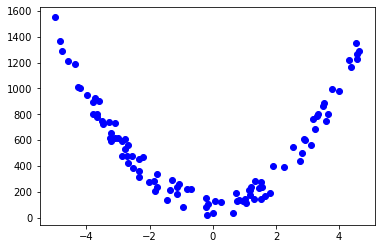

In [164]:
plt.plot(x_po,y_po,'bo')

In [165]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias=False)

In [166]:
x_poly = poly.fit_transform(x_po)

In [170]:
x_po[0],x_poly[0]

(array([-2.88017509]), array([-2.88017509,  8.29540855]))

In [167]:
lin_reg.fit(x_poly,y_po)

LinearRegression()

In [168]:
x_new_po = np.linspace(-5,5,200).reshape(200,1)
# print(x_new_po)
x_new_poly = poly.transform(x_new_po)
y_poly = lin_reg.predict(x_new_poly)

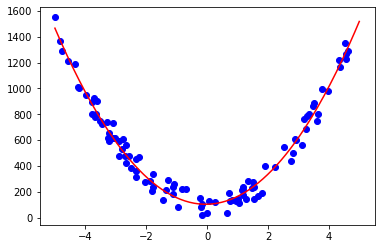

In [169]:
plt.plot(x_po,y_po,'bo')
plt.plot(x_new_po,y_poly,'r-')